### 4 Setps for tensorflow model
- Prepare Data
- Inference
- Loss Calculation
- Optimize

#### Import

In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

### 1. Prepare Data

Generation some house sizes in sq ft

In [2]:
num_house = 160
np.random.seed(42)
house_size = np.random.randint(low=1000, high=3500, size=num_house)

Generation house price from house sizes

In [3]:
np.random.seed(42)
house_price = house_size * 100 + np.random.randint(low=20000, high=70000, size=num_house)

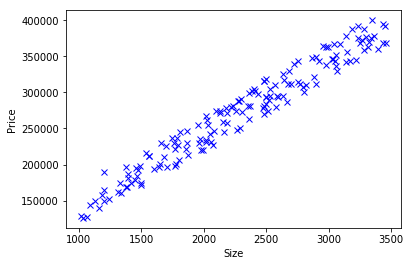

In [4]:
plt.plot(house_size, house_price, "bx") # blue x
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

We will normalize values to prevent under/overflow

In [5]:
def normalize(array):
    return (array - array.mean())/ array.std()

We will split dataset

In [6]:
num_train_samples = math.floor(num_house * 0.7)

Defining  training data

In [7]:
train_house_size = np.asarray(house_size[:num_train_samples])
train_house_price = np.asarray(house_price[:num_train_samples])

In [8]:
train_house_size_norm = normalize(train_house_size)
train_house_price_norm = normalize(train_house_price)

Defining test data

In [9]:
test_house_size = np.asarray(house_size[num_train_samples:])
test_house_price = np.asarray(house_price[num_train_samples:])

In [10]:
test_house_size_norm = normalize(test_house_size)
test_house_price_norm = normalize(test_house_price)

let's setup tensorflow placeholders 

In [11]:
tf_house_size = tf.placeholder("float", name = "house_size")
tf_house_price = tf.placeholder("float", name = "house_price")

Define the variables holding size_factor and price_offset <br>
y = size_factor * x + price_offset

In [12]:
tf_size_factor = tf.Variable(np.random.randn(), name="size_factor")
tf_price_offset = tf.Variable(np.random.randn(), name="price_offset")

### 2. Inference 

Define the operation

In [13]:
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset)

### 3. Loss Calculation

define the loss function

In [14]:
tf_cost = tf.reduce_sum(tf.pow(tf_house_price-tf_price_pred, 2))/ (2*num_train_samples)

### 4. Optimize

In [15]:
learning_rate = 0.1

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

Initializing the varialbes

In [17]:
init = tf.global_variables_initializer()

iteration #: 0002 cost= 0.720058978 size_factor= 0.09177996 price_offset= -0.78197587
iteration #: 0004 cost= 0.488989919 size_factor= 0.25305912 price_offset= -0.6400547
iteration #: 0006 cost= 0.334198922 size_factor= 0.38506955 price_offset= -0.52387947
iteration #: 0008 cost= 0.230510592 size_factor= 0.4931228 price_offset= -0.42877954
iteration #: 0010 cost= 0.161057383 size_factor= 0.5815667 price_offset= -0.35093102
iteration #: 0012 cost= 0.114538930 size_factor= 0.65396035 price_offset= -0.2872049
iteration #: 0014 cost= 0.083384469 size_factor= 0.713216 price_offset= -0.23503916
iteration #: 0016 cost= 0.062521771 size_factor= 0.76171756 price_offset= -0.19233663
iteration #: 0018 cost= 0.048552584 size_factor= 0.8014175 price_offset= -0.1573807
iteration #: 0020 cost= 0.039200630 size_factor= 0.8339127 price_offset= -0.1287661
iteration #: 0022 cost= 0.032940891 size_factor= 0.86051065 price_offset= -0.10534229
iteration #: 0024 cost= 0.028751854 size_factor= 0.882282 price_

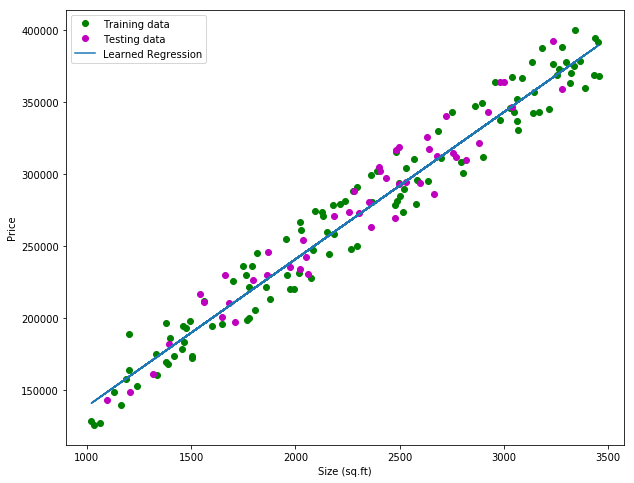

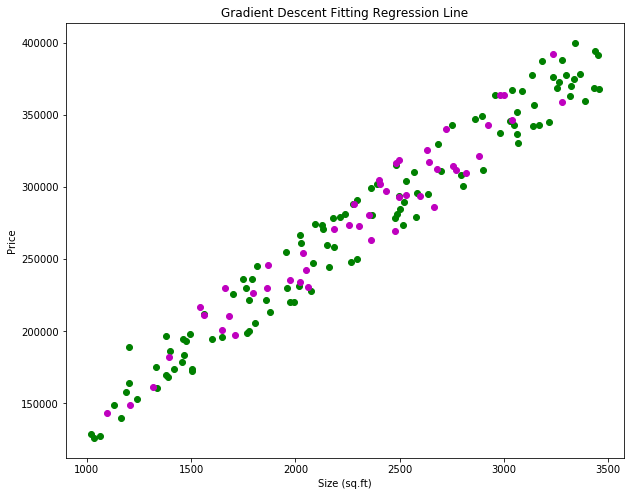

In [18]:
with tf.Session() as sess:
    sess.run(init)
    
    # set how often to display training progress
    display_every = 2
    num_training_iter = 50
    
    #number of lines for animation
    fit_num_plots = math.floor(num_training_iter/display_every)
    # add sotrage of factor and offset values from each epoch
    fit_size_factor = np.zeros(fit_num_plots)
    fit_price_offsets = np.zeros(fit_num_plots)
    fit_plot_idx = 0
    
    #iterate training data
    for iteration in range(num_training_iter):
        
        #fit the training data
        for (x,y) in zip(train_house_size_norm, train_house_price_norm):
            sess.run(optimizer, feed_dict={tf_house_size: x, tf_house_price:y})
    
        # display current status
        if (iteration + 1) % display_every == 0 :
            c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_house_price : train_house_price_norm})
            print("iteration #:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(c), \
                "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))
            # save the fit size_factor and price_offset to allow funky animation of learning
            fit_size_factor[fit_plot_idx] = sess.run(tf_size_factor)
            fit_price_offsets[fit_plot_idx] = sess.run(tf_price_offset)
            fit_plot_idx = fit_plot_idx + 1

    print("Optimization Finished!")
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_house_price:train_house_price_norm})
    print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))
    
    
    # Plot of training and test data, and learned regression
    # get values used to normalized data so we can denormalize data back to its original scale
    train_house_size_mean = train_house_size.mean()
    train_house_size_std = train_house_size.std()

    train_price_mean = train_house_price.mean()
    train_price_std = train_house_price.std()

    # Plot the graph

    plt.rcParams["figure.figsize"] = (10,8)
    plt.figure()
    plt.xlabel("Size (sq.ft)")
    plt.ylabel("Price")
    plt.plot(train_house_size, train_house_price, 'go', label='Training data')
    plt.plot(test_house_size, test_house_price, 'mo', label='Testing data')
    plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean,
             (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean,
             label='Learned Regression')

    plt.legend(loc='upper left')
    plt.show()
    
    ## Let's do the animation 
    # plot the another graph that will animate how the gradient descent sequentially adjusted size_factor and price offset
    
    fig, ax = plt.subplots()
    line, = ax.plot(house_size, house_price)

    plt.rcParams["figure.figsize"] = (10,8)
    plt.title("Gradient Descent Fitting Regression Line")
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_house_price, 'go', label='Training data')
    plt.plot(test_house_size, test_house_price, 'mo', label='Testing data')

    def animate(i):
        line.set_xdata(train_house_size_norm * train_house_size_std + train_house_size_mean)  # update the data
        line.set_ydata((fit_size_factor[i] * train_house_size_norm + fit_price_offsets[i]) * train_price_std + train_price_mean)  # update the data
        return line,

     # Init only required for blitting to give a clean slate.
    def initAnim():
        line.set_ydata(np.zeros(shape=house_price.shape[0])) # set y's to 0
        return line,

    ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, fit_plot_idx), init_func=initAnim,
                                 interval=1000, blit=True)

    plt.show()   
